## Multivariate Single Target multi step Timeseries 

### import package

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [16]:
import requests
def get_crypto_price(symbol, interval, n_interval):
    api_key = '50c2194bb80e4f4c888a531bbc3bda15'
    api_url = f'https://api.twelvedata.com/time_series?symbol={symbol}&exchange=binance&interval={interval}&outputsize={n_interval}&apikey={api_key}'
    raw = requests.get(api_url).json()
    df = pd.DataFrame(raw['values']).set_index('datetime')
    df = df.iloc[::-1]
    return df

df = get_crypto_price('BTC/USD', '4h', 5000)
print(df)

                            open         high          low        close
datetime                                                               
2020-12-28 08:00:00  27028.35938  27043.46094  26599.96094  26859.02930
2020-12-28 12:00:00  26846.52930  27437.89062  26728.90039  26910.25000
2020-12-28 16:00:00  27000.00000  27229.55078  26770.00000  26997.23047
2020-12-28 20:00:00  27007.46094  27147.32031  26498.93945  27068.35938
2020-12-29 00:00:00  27079.41992  27098.30078  26475.00000  26500.76953
...                          ...          ...          ...          ...
2023-04-11 12:00:00  30055.14000  30280.00000  29975.00000  30194.22000
2023-04-11 16:00:00  30194.23000  30550.00000  30040.00000  30130.02000
2023-04-11 20:00:00  30130.02000  30274.19000  29940.00000  30200.42000
2023-04-12 00:00:00  30200.43000  30350.07000      3.02450  29922.04000
2023-04-12 04:00:00  29922.04000  29999.23000  29850.00000  29964.03000

[5000 rows x 4 columns]


In [17]:
df.isnull().sum()

open     0
high     0
low      0
close    0
dtype: int64

### Plot the multivariate timeserise

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 2020-12-28 08:00:00 to 2023-04-12 04:00:00
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   open    5000 non-null   object
 1   high    5000 non-null   object
 2   low     5000 non-null   object
 3   close   5000 non-null   object
dtypes: object(4)
memory usage: 195.3+ KB


In [19]:
df = df.iloc[:,:].astype(float)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 2020-12-28 08:00:00 to 2023-04-12 04:00:00
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    5000 non-null   float64
 1   high    5000 non-null   float64
 2   low     5000 non-null   float64
 3   close   5000 non-null   float64
dtypes: float64(4)
memory usage: 195.3+ KB


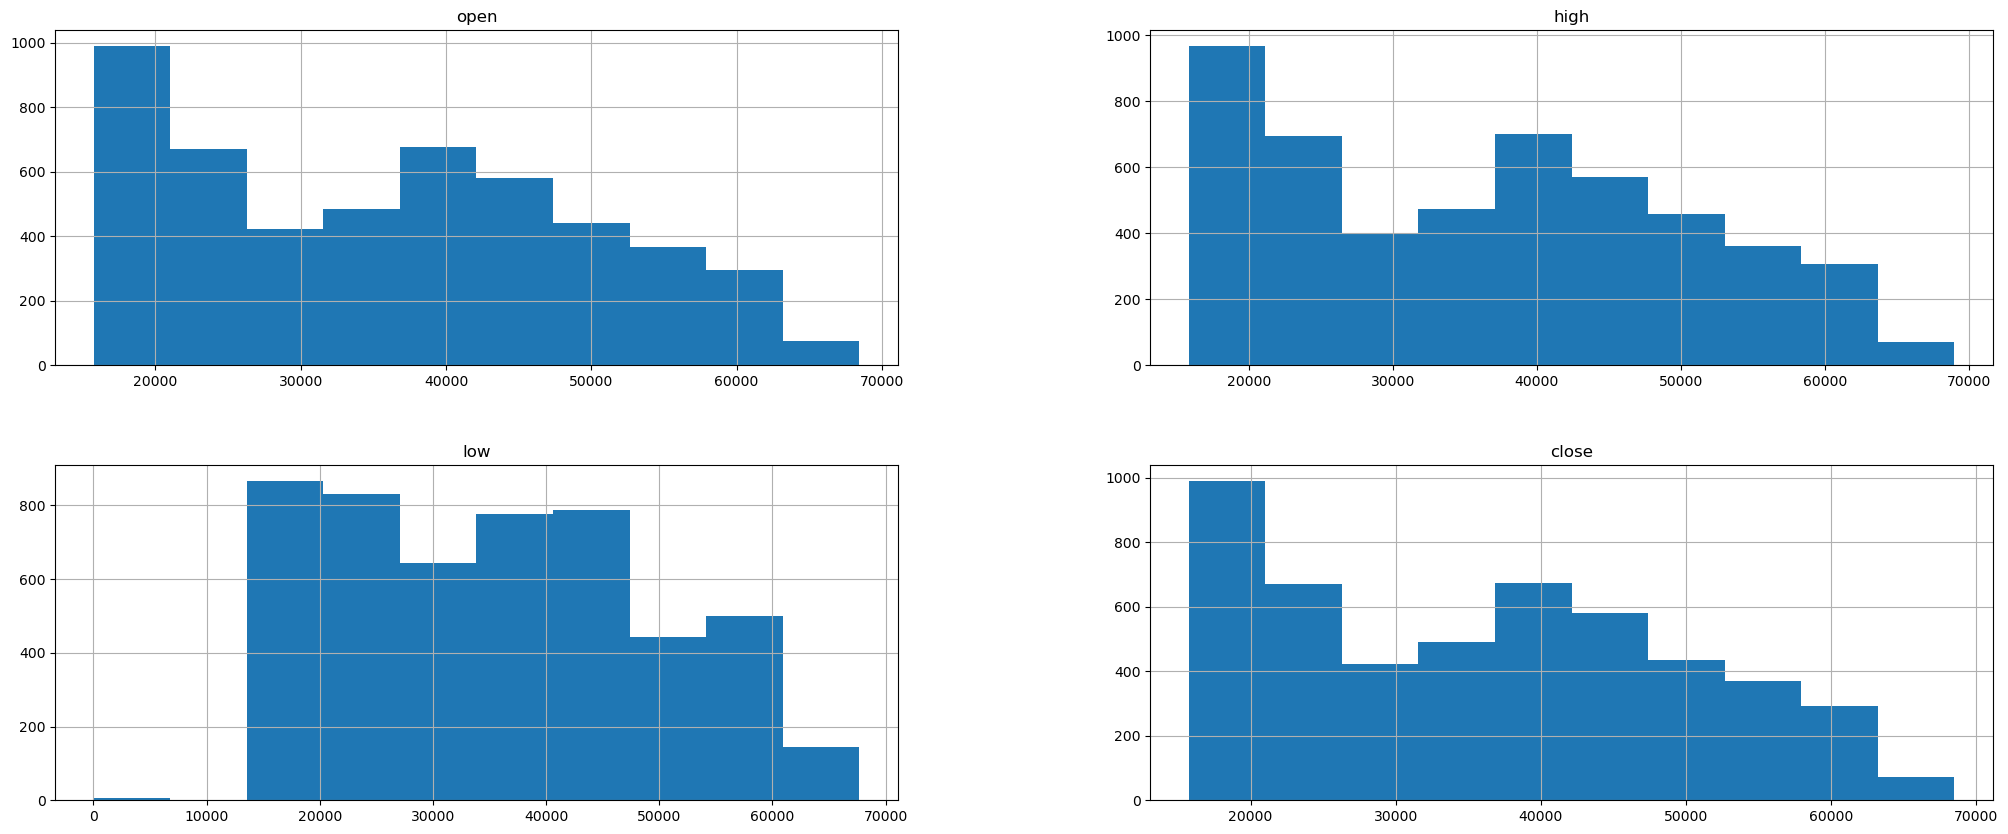

In [21]:
df.hist(figsize=(25,10))
plt.show()

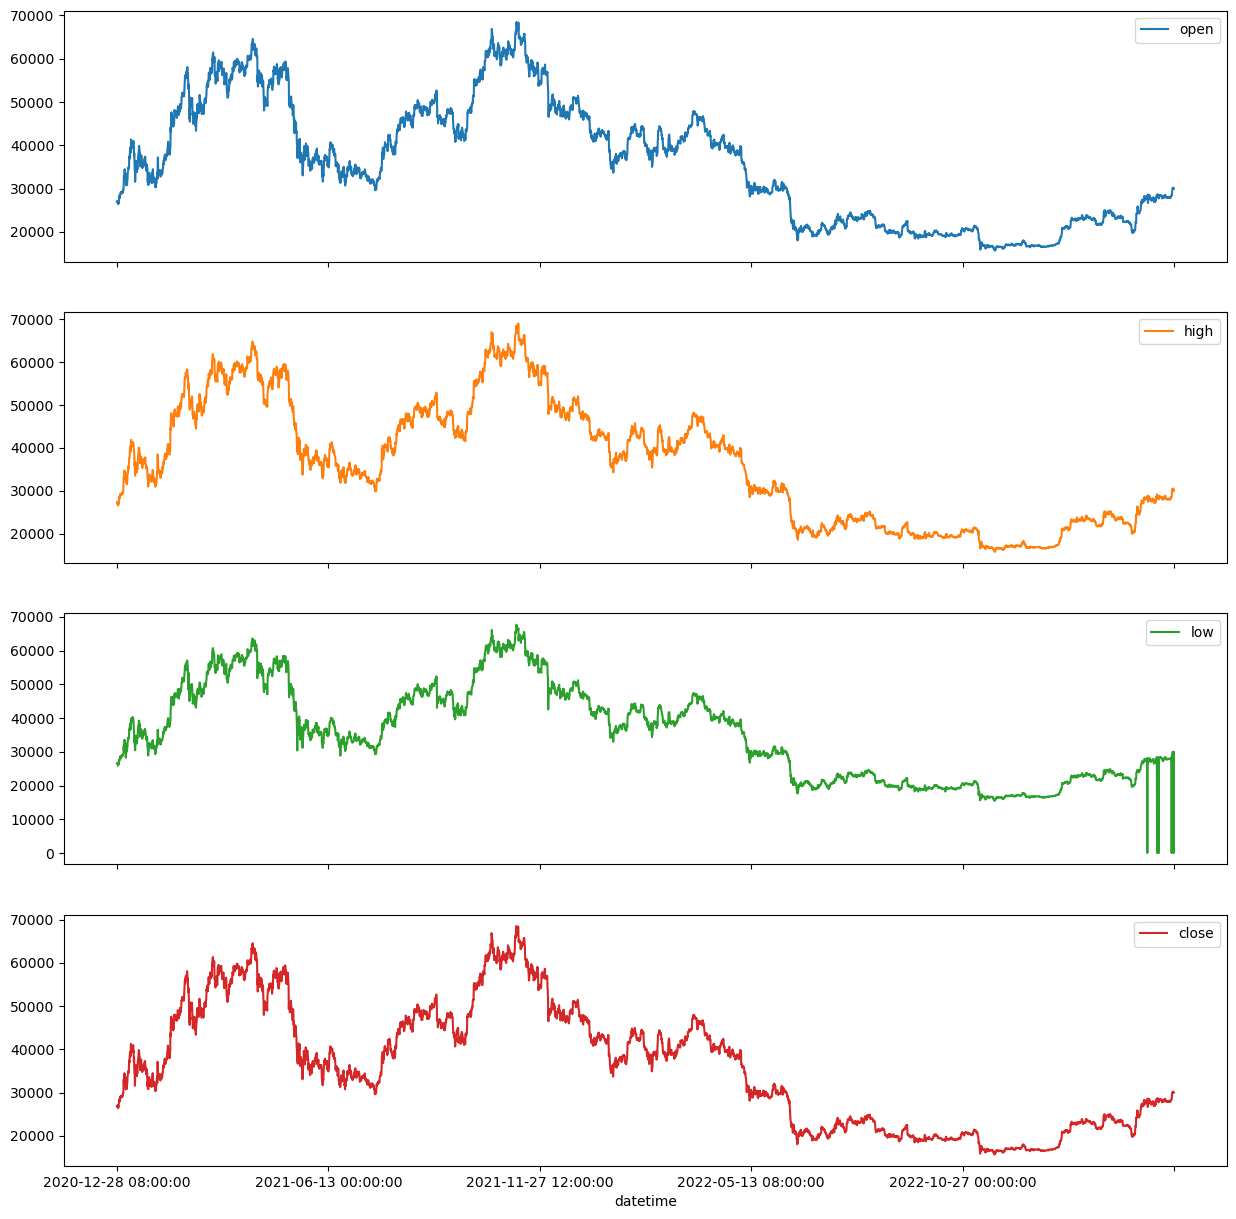

In [22]:
df.plot(subplots=True,figsize=(15,15))
plt.show()

In [26]:
# pip install statsmodell
import statsmodels.tsa.stattools as sts

In [27]:
df = pd.DataFrame(df)

In [29]:
df.head()

,open,high,low,close
datetime,,,,
2020-12-28 08:00:00,27028.35938,27043.46094,26599.96094,26859.02930
2020-12-28 12:00:00,26846.52930,27437.89062,26728.90039,26910.25000
2020-12-28 16:00:00,27000.00000,27229.55078,26770.00000,26997.23047
2020-12-28 20:00:00,27007.46094,27147.32031,26498.93945,27068.35938
2020-12-29 00:00:00,27079.41992,27098.30078,26475.00000,26500.76953


In [31]:
sts.adfuller(df.close)

(-1.5286814830103097,
 0.5192783362069177,
 26,
 4973,
 {'1%': -3.431665640184842,
  '5%': -2.8621213700013244,
  '10%': -2.567079464076049},
 77908.85614178542)